
# Big mart

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [4]:
df_train=pd.read_csv('bigdatamart_Train.csv')
df_test=pd.read_csv('bigdatamart_Test.csv')

In [5]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df_train.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

<AxesSubplot:>

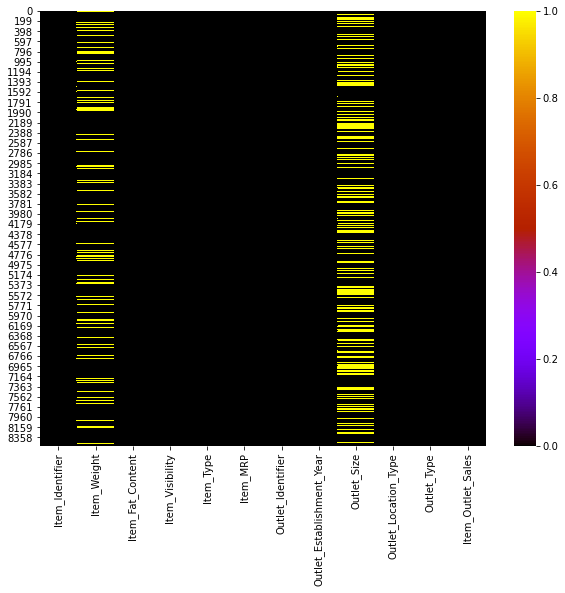

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.isna(),cmap='gnuplot')

In [9]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


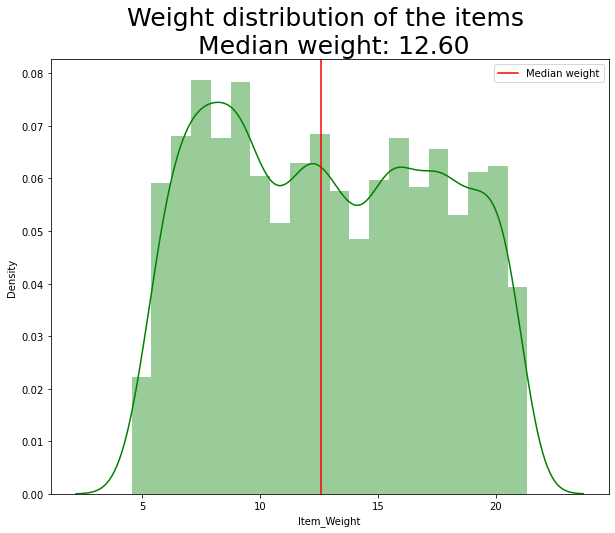

In [10]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['Item_Weight'].dropna(),color='green')
plt.title('Weight distribution of the items \n Median weight: {0:.2f}'.format(df_train['Item_Weight'].dropna().median()),size=25)
plt.axvline(df_train['Item_Weight'].dropna().median(),color='red',label='Median weight')
plt.legend()

C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specifi

Text(0.5, 1.0, 'Violinplot of weights')

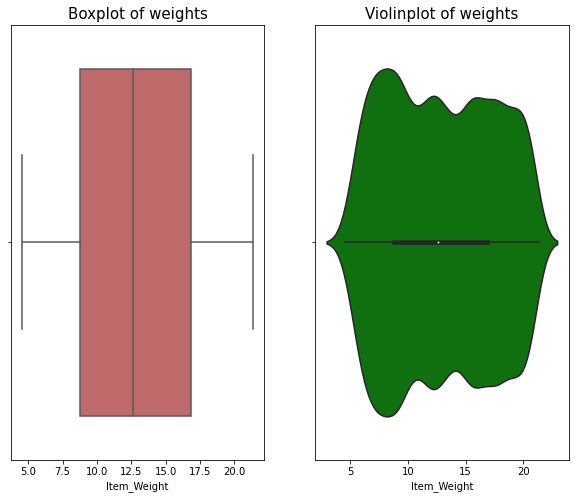

In [11]:
fig1=plt.figure(figsize=(10,8))
ax1=fig1.add_subplot(121)
sns.boxplot(df_train['Item_Weight'],ax=ax1,orient='v',color='indianred')
ax1.set_title('Boxplot of weights',size=15)

ax2=fig1.add_subplot(122)
sns.violinplot(df_train['Item_Weight'],ax=ax2,orient='v',color='green')
ax2.set_title('Violinplot of weights',size=15)

In [12]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('low fat','Low Fat')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('LF','Low Fat')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('reg','Regular')
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [15]:
df_train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


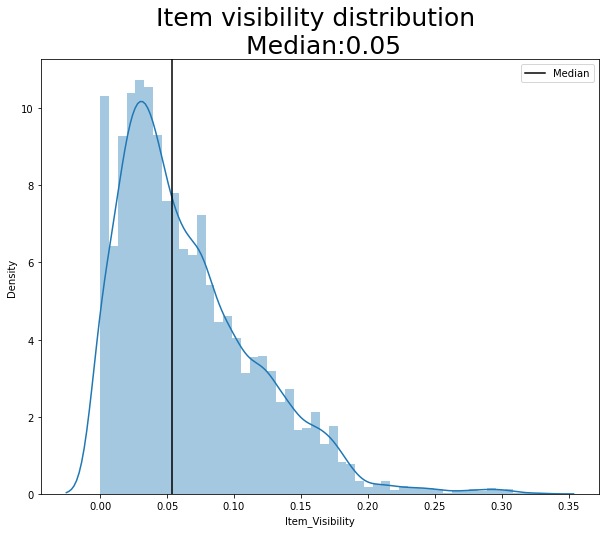

In [16]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['Item_Visibility'])
plt.title('Item visibility distribution \n Median:{0:.2f}'.format(df_train['Item_Visibility'].median()),size=25)
plt.axvline(df_train['Item_Visibility'].median(),color='black',label='Median')
plt.legend()

C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


((array([-3.77092014, -3.54353752, -3.4185981 , ...,  3.4185981 ,
          3.54353752,  3.77092014]),
  array([0.        , 0.        , 0.        , ..., 0.32111501, 0.32578081,
         0.32839095])),
 (0.04934877527401508, 0.06613202877895105, 0.9560728731678179))

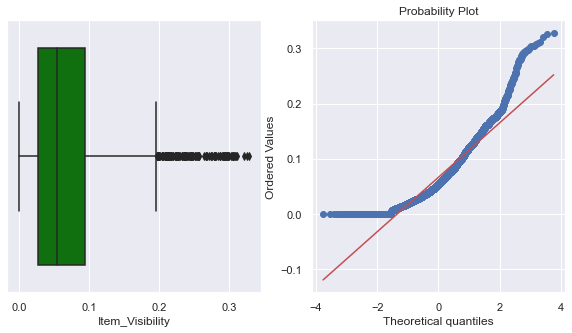

In [17]:
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(df_train['Item_Visibility'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(df_train['Item_Visibility'],plot=ax2)

In [18]:
df_train[df_train['Item_Visibility']>0.2].shape[0]

134

((array([-3.7669643 , -3.53935697, -3.41428343, ...,  3.41428343,
          3.53935697,  3.7669643 ]),
  array([0.        , 0.        , 0.        , ..., 0.19899855, 0.19993588,
         0.19995527])),
 (0.04487626591626393, 0.06322235269591131, 0.9681235088881059))

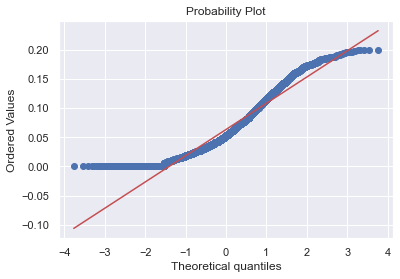

In [19]:
df_train=df_train[df_train['Item_Visibility']<0.2]
stats.probplot(df_train['Item_Visibility'],plot=plt)

C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


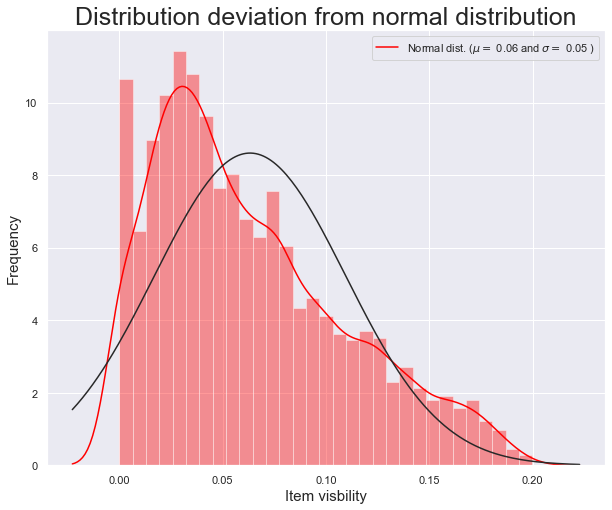

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['Item_Visibility'],fit=norm,color='red')
plt.title('Distribution deviation from normal distribution',size=25)
plt.ylabel('Frequency',size=15)
plt.xlabel('Item visbility',size=15)
mu=df_train['Item_Visibility'].mean()
sigma=df_train['Item_Visibility'].std()
plt.legend(['Normal dist. ($\mu=$ {0:.2f} and $\sigma=$ {1:.2f} )'.format(mu, sigma)])

# item mrp

C:\Users\bhakti.thaker\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


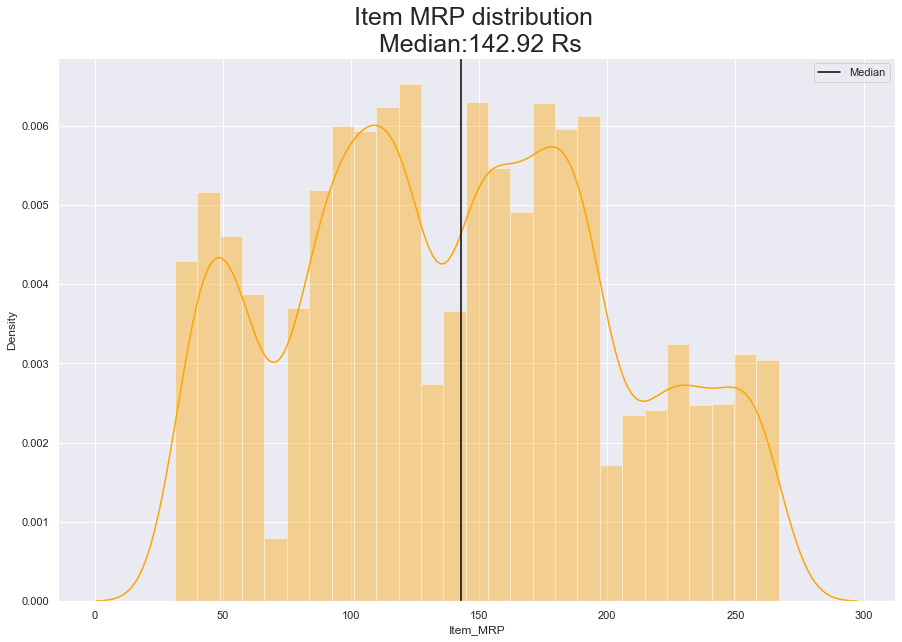

In [21]:
plt.figure(figsize=(15,10))
sns.distplot(df_train['Item_MRP'],color='orange')
plt.title('Item MRP distribution \n Median:{0:.2f} Rs'.format(df_train['Item_MRP'].median()),size=25)
plt.axvline(df_train['Item_MRP'].median(),color='black',label='Median')
plt.legend()

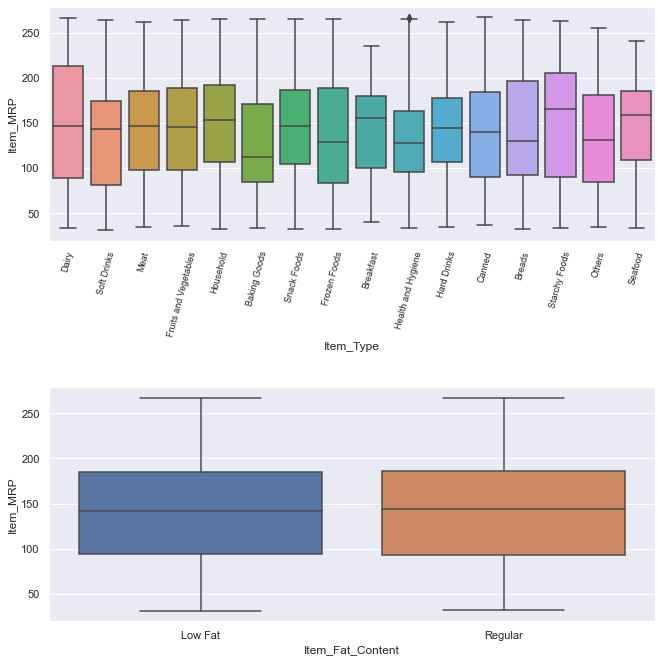

In [22]:
labels=df_train['Item_Type'].unique()
fig6=plt.figure(figsize=(10,10))
ax1=fig6.add_subplot(211)
sns.boxplot(x='Item_Type',y='Item_MRP',data=df_train,ax=ax1)
ax1.set_xticklabels(labels, rotation=75,size=9)

ax2=fig6.add_subplot(212)
sns.boxplot(x='Item_Fat_Content',y='Item_MRP',data=df_train,ax=ax2)

fig6.tight_layout(pad=3) #For spacing between subplots

# corelation

In [23]:
df_train.drop('Count',axis=1,inplace=True)

<AxesSubplot:>

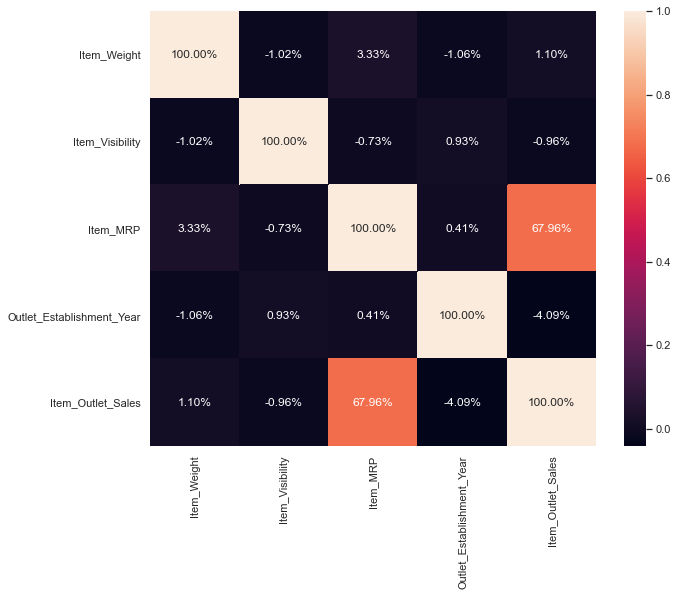

In [24]:
corrs=df_train.dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs,annot=True,fmt='.2%')

In [25]:
unn_cols=['Item_Weight','Outlet_Size','Item_Identifier','Outlet_Identifier']

for cols in unn_cols:
    df_train.drop(cols,axis=1,inplace=True)

In [26]:
df_train['Item_Fat_Content'].replace('Low Fat',1,inplace=True)
df_train['Item_Fat_Content'].replace('Regular',0,inplace=True)

In [27]:
df_dummies_type=pd.get_dummies(df_train['Item_Type'])

In [28]:
df_train=df_train.merge(df_dummies_type,on=df_train.index)


# Training phase

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [32]:
targets=df_train['Item_Outlet_Sales']
df_train.drop('Item_Outlet_Sales',axis=1,inplace=True)
df_train.head()

,key_0,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,1,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,1,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
X_train,X_test,y_train,y_test=train_test_split(df_train,targets,shuffle=True,test_size=0.2,random_state=0)

# Linear regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)

ValueError: could not convert string to float: 'Fruits and Vegetables'